# Wczytanie danych i odpowiednich pakietów

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [2]:
X = pd.read_csv('X.csv')

In [3]:
y = pd.read_csv('y.csv')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# numer indeksu: 320565

# Pierwsza pętla dla "gini"

In [5]:
scores_all_gini = []
scores_help_gini = []

for i in range(1, 11):
    for j in range(50, 151, 50):
        Tree_ij = tree.DecisionTreeClassifier(max_depth = i, criterion = "gini", min_samples_leaf = j, random_state = 320565)
        scores = cross_val_score(Tree_ij, X_train, y_train, cv = 5, scoring = 'roc_auc')
        scores = np.mean(scores)
        scores_help_gini.append(scores)
    scores_all_gini.append(scores_help_gini)
    scores_help_gini = []
np.asarray(scores_all_gini) # macierz ze wszystkimi kombinacjami max_depth oraz min_samples_leaf

array([[0.63264003, 0.63264003, 0.63264003],
       [0.68491844, 0.68491844, 0.68503201],
       [0.72926644, 0.7287021 , 0.72916445],
       [0.7707156 , 0.77117203, 0.76934263],
       [0.80837825, 0.80652518, 0.80351837],
       [0.83751396, 0.83245026, 0.8265071 ],
       [0.85795675, 0.84798429, 0.83971407],
       [0.86492374, 0.85439234, 0.84356563],
       [0.87242282, 0.8572142 , 0.84521024],
       [0.87405538, 0.85832926, 0.84554743]])

In [6]:
np.max(scores_all_gini)

0.8740553816488278

In [7]:
np.unravel_index(np.argmax(scores_all_gini), np.shape(scores_all_gini))

(9, 0)

# Druga pętla dla "gini"

In [8]:
scores_all_gini_2 = []

for i in range(1, 20):
        Tree_ij = tree.DecisionTreeClassifier(max_depth = 10, criterion = "gini", min_samples_leaf = 50, random_state = 320565, max_features = i)
        scores = cross_val_score(Tree_ij, X_train, y_train, cv = 5, scoring = 'roc_auc')
        scores = np.mean(scores)
        scores_all_gini_2.append(scores)

In [9]:
np.max(scores_all_gini_2)

0.8755300333312832

In [10]:
np.argmax(scores_all_gini_2)

18

# Pierwsza pętla dla "entropy"

In [11]:
scores_all_entropy = []
scores_help_entropy = []

for i in range(1, 11):
    for j in range(50, 151, 50):
        Tree_ij = tree.DecisionTreeClassifier(max_depth = i, criterion = "entropy", min_samples_leaf = j, random_state = 320565)
        scores = cross_val_score(Tree_ij, X_train, y_train, cv = 5, scoring = 'roc_auc')
        scores = np.mean(scores)
        scores_help_entropy.append(scores)
    scores_all_entropy.append(scores_help_entropy)
    scores_help_entropy = []
np.asarray(scores_all_entropy) # macierz ze wszystkimi kombinacjami max_depth oraz min_samples_leaf

array([[0.63050588, 0.63050588, 0.63050588],
       [0.6836468 , 0.6836468 , 0.68376042],
       [0.7259806 , 0.72536825, 0.72563642],
       [0.77603227, 0.77474058, 0.77329955],
       [0.81347854, 0.81089858, 0.80708539],
       [0.83948209, 0.83396664, 0.82977039],
       [0.85951186, 0.84718321, 0.83938402],
       [0.86795881, 0.85429734, 0.84374156],
       [0.87871842, 0.8589587 , 0.84643734],
       [0.88102915, 0.85994988, 0.84663653]])

In [12]:
np.max(scores_all_entropy)

0.8810291529926146

In [13]:
np.unravel_index(np.argmax(scores_all_entropy), np.shape(scores_all_entropy))

(9, 0)

# Druga pętla dla "entropy"

In [14]:
scores_all_entropy_2 = []

for i in range(1, 20):
        Tree_ij = tree.DecisionTreeClassifier(max_depth = 10, criterion = "entropy", min_samples_leaf = 50, random_state = 320565, max_features = i)
        scores = cross_val_score(Tree_ij, X_train, y_train, cv = 5, scoring = 'roc_auc')
        scores = np.mean(scores)
        scores_all_entropy_2.append(scores)

In [15]:
np.max(scores_all_entropy_2)

0.8824244567096807

In [16]:
np.argmax(scores_all_entropy_2)


15

Wybieram: "entropy", max_depth = 10, min_samples_leaf = 50, max_features = 16

In [18]:
Tree = tree.DecisionTreeClassifier(max_depth = 10, criterion = "entropy", min_samples_leaf = 50, random_state = 320565, max_features = 16)
Tree = Tree.fit(X_train, y_train)

In [19]:
y_pred_test = Tree.predict(X_test)

In [20]:
confusion_matrix(y_test, y_pred_test)

array([[2450,  554],
       [ 695, 2301]], dtype=int64)

In [21]:
accuracy = accuracy_score(y_test, y_pred_test)
accuracy

0.7918333333333333

In [22]:
recall = recall_score(y_test, y_pred_test)
recall

0.7680240320427236

In [23]:
precision = precision_score(y_test, y_pred_test)
precision

0.805954465849387

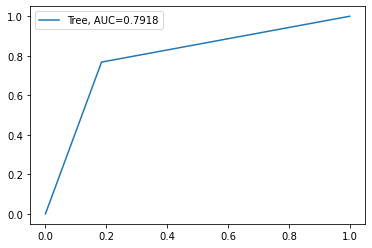

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label="Tree, AUC=" + str(round(roc_auc_score(y_test, y_pred_test), 4)))
plt.legend()

In [45]:
roc_auc_score(y_test, y_pred_test)

0.7918016298695641